# KNN: Breast Cancer Wisconsin (Diagnostic) Dataset (D3) - Standard Scaling

## Loading Packages

In [1]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

## Loading the dataset

In [2]:
df = pd.read_csv("data.csv")
data_df = df.drop(columns=["diagnosis"]) # drop label

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_df)
data_df = pd.DataFrame(scaled_data)
y = df["diagnosis"]

## Data Preparation

#### Training Set

In [3]:
data_train_df = data_df.sample(frac=0.8, random_state=0) # sample 80% for training 
data_train_y = y[data_train_df.index]

data_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
512,-0.206561,0.286311,-0.137124,-0.279260,1.013376,0.806556,0.699320,0.846065,1.111279,1.481735,...,0.029159,0.648570,0.179870,-0.063607,1.097274,0.835474,1.143785,1.377912,1.106957,1.493688
457,-0.260524,1.387014,-0.324127,-0.332729,-0.601368,-0.990992,-0.766849,-0.728400,-0.703240,-0.986314,...,-0.397431,1.392767,-0.475716,-0.435405,-0.152049,-0.941264,-0.638975,-0.830706,-0.738931,-0.890300
439,-0.030472,-0.844644,-0.097993,-0.137624,-1.188483,-0.919734,-0.852851,-0.577763,-0.812768,-0.983478,...,-0.281464,-1.036863,-0.319638,-0.336962,-1.269864,-0.970527,-1.005506,-0.494046,-1.237207,-0.933525
298,0.037691,-0.260550,-0.030853,-0.061970,-2.177683,-0.988149,-0.804137,-0.907410,-0.644825,-0.983478,...,-0.010186,-0.067942,-0.043523,-0.107027,-1.662195,-0.238966,-0.555018,-0.598500,-0.428317,-0.398208
37,-0.311646,-0.202373,-0.385500,-0.372831,-0.464730,-1.263703,-0.793214,-0.507861,-1.258183,-0.590802,...,-0.614867,-0.466909,-0.679153,-0.588344,-1.549975,-1.323648,-1.073966,-0.981753,-1.478256,-1.233324


In [4]:
data_train_y

512    0
457    1
439    1
298    1
37     1
      ..
86     0
266    1
36     0
193    0
58     1
Name: diagnosis, Length: 455, dtype: int64

#### Test Set

In [5]:
data_test_df = data_df.drop(data_train_df.index) # get remaining 20%
data_test_y = y[data_test_df.index]       

data_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856
23,1.997389,0.872732,1.863073,2.130548,-0.148044,-0.040575,0.262407,0.964717,-0.155598,-1.420100,...,2.671532,1.614234,2.404872,3.048953,0.338913,0.036482,0.207788,1.313961,-0.127409,-0.481332
28,0.333066,1.391668,0.429654,0.220449,0.842579,1.238650,0.998129,0.995412,0.417600,0.368916,...,0.828498,1.796619,1.252161,0.682803,1.390974,2.269333,1.733401,1.336800,1.822016,0.820940
41,-0.902396,0.479458,-0.826648,-0.807125,1.874478,0.330874,0.195866,0.200441,0.304421,0.836725,...,-0.710125,1.573523,-0.596944,-0.644421,2.565776,0.098824,0.624213,0.423205,0.102315,0.671317


## Creating and Training the Model

#### k = 1

In [6]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(data_train_df, data_train_y)

KNeighborsClassifier(n_neighbors=1)

#### k = 3

In [7]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(data_train_df, data_train_y)

KNeighborsClassifier(n_neighbors=3)

## Predicting Labels for Test Set

In [8]:
# k = 1
knn1_prediction = knn1.predict(data_test_df)
knn1_prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [9]:
# k = 3
knn3_prediction = knn3.predict(data_test_df)
knn3_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

## Evaluating the KNN Models

#### Results for k = 1

In [10]:
# Accuracy
acc1 = knn1.score(data_test_df, data_test_y)
acc1

0.956140350877193

In [11]:
# Confusion Matrix
cm1 = confusion_matrix(data_test_y, knn1_prediction)
cm1

array([[40,  4],
       [ 1, 69]], dtype=int64)

#### Results for k = 3

In [12]:
# Accuracy (Best Accuracy)
acc3 = knn3.score(data_test_df, data_test_y)
acc3

0.9824561403508771

In [13]:
# Confusion Matrix
cm3 = confusion_matrix(data_test_y, knn3_prediction)
cm3

array([[42,  2],
       [ 0, 70]], dtype=int64)

In [14]:
print("kNN, k = 1 accuracy:", acc1)
print(cm1)

print("kNN, k = 3 accuracy:", acc3)
print(cm3)

kNN, k = 1 accuracy: 0.956140350877193
[[40  4]
 [ 1 69]]
kNN, k = 3 accuracy: 0.9824561403508771
[[42  2]
 [ 0 70]]


In [15]:
# k = 5 has the best accuracy
# range 5 - 11
best_k = 0
best_k_model = None
best_k_acc = 0

for k in range(5,12):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data_train_df, data_train_y)
    
    score = knn.score(data_test_df, data_test_y)
    print("K = " + str(k))
    print("Accuracy: " + str(score) + "\n")

K = 5
Accuracy: 0.9824561403508771

K = 6
Accuracy: 0.9736842105263158

K = 7
Accuracy: 0.9736842105263158

K = 8
Accuracy: 0.9736842105263158

K = 9
Accuracy: 0.9736842105263158

K = 10
Accuracy: 0.9649122807017544

K = 11
Accuracy: 0.9736842105263158



# Decision Tree

### Loading Packages

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


#### First 10 Features

In [17]:

# Loading Dataset
df = pd.read_csv('data.csv')                   
data_df = df.drop(columns=["diagnosis"])
data_scale = StandardScaler()
scaled_data = data_scale.fit_transform(data_df)
data_df = pd.DataFrame(scaled_data)

data_df2 = data_df[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]] # int cause of dataframe conversion of scaled data
y = df["diagnosis"]  
data_classes = ["0", "1"]

data_features = data_df2.columns.tolist()
data_features

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [18]:
# Data Prep
# Split training (60%) and test (40%)
data_train_df = data_df2.sample(frac=0.6, random_state=0)         
data_train_y = y[data_train_df.index]      

data_test_df = data_df2.drop(data_train_df.index) 
data_test_y = y[data_test_df.index]  

In [19]:
# Train Model
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier = dt_classifier.fit(data_train_df, data_train_y)

In [20]:
# Evaluate Model

prediction = dt_classifier.predict(data_test_df)
accuracy = dt_classifier.score(data_test_df, data_test_y)
conf_matrix = confusion_matrix(data_test_y, prediction)

print(accuracy)
print(conf_matrix)

0.9122807017543859
[[ 80   9]
 [ 11 128]]


In [21]:
# Decision Tree Viz (First 10)

# Visualize the tree as a text
tree_text = export_text(dt_classifier, feature_names=data_features)
print(tree_text)

|--- 7 <= 0.18
|   |--- 3 <= 0.12
|   |   |--- 7 <= -0.11
|   |   |   |--- 7 <= -0.47
|   |   |   |   |--- 1 <= 0.74
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- 1 >  0.74
|   |   |   |   |   |--- 1 <= 0.77
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- 1 >  0.77
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- 7 >  -0.47
|   |   |   |   |--- 5 <= -0.75
|   |   |   |   |   |--- 1 <= -0.38
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- 1 >  -0.38
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- 5 >  -0.75
|   |   |   |   |   |--- 7 <= -0.46
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- 7 >  -0.46
|   |   |   |   |   |   |--- class: 1
|   |   |--- 7 >  -0.11
|   |   |   |--- 0 <= -0.28
|   |   |   |   |--- 6 <= 0.29
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- 6 >  0.29
|   |   |   |   |   |--- 1 <= -0.11
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- 1 >  -0.11
|   |   |   |   |   |   |-

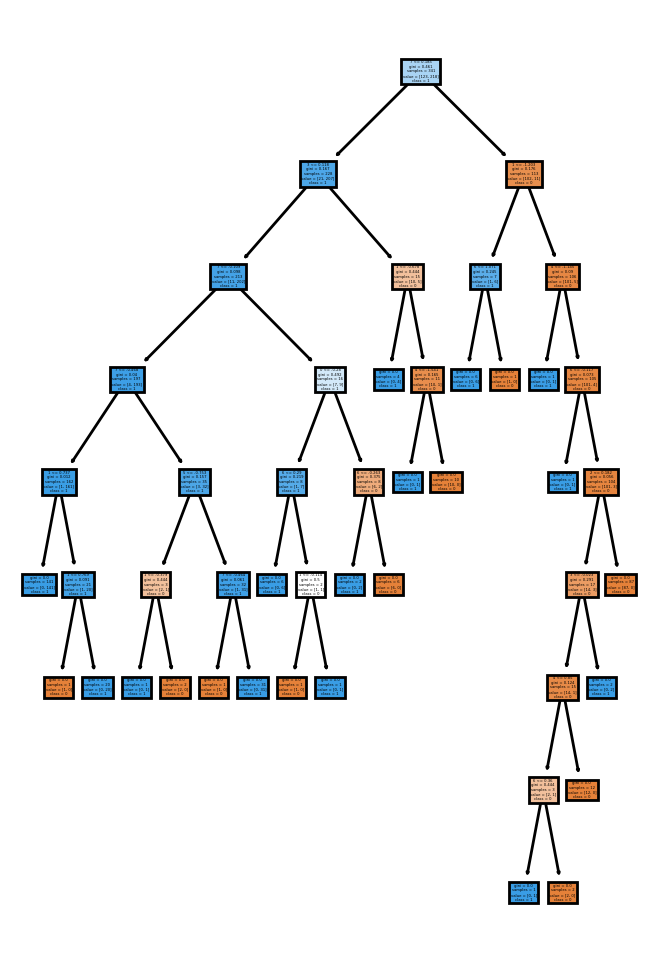

In [22]:
# Decision Tree Better Viz (First 10)

# Visualize the tree as a plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 6), dpi=200)
plot_tree(dt_classifier, filled=True, feature_names=data_features, class_names=data_classes, ax=axes)
plt.show()

#### Middle 10 Features

In [23]:
# Loading Dataset
df = pd.read_csv('data.csv')                   
data_df = df.drop(columns=["diagnosis"])
data_scale = StandardScaler()
scaled_data = data_scale.fit_transform(data_df)
data_df = pd.DataFrame(scaled_data)

data_df2 = data_df[[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]
y = df["diagnosis"]  
data_classes = ["0", "1"]

data_features = data_df2.columns.tolist()
data_features

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [24]:
# Data Prep
# Split training (60%) and test (40%)
data_train_df = data_df2.sample(frac=0.6, random_state=0)         
data_train_y = y[data_train_df.index]      

data_test_df = data_df2.drop(data_train_df.index) 
data_test_y = y[data_test_df.index]  

In [25]:
# Train Model
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier = dt_classifier.fit(data_train_df, data_train_y)

In [27]:
# Evaluate Model

prediction = dt_classifier.predict(data_test_df)
accuracy = dt_classifier.score(data_test_df, data_test_y)
conf_matrix = confusion_matrix(data_test_y, prediction)

print(accuracy)
print(conf_matrix)

0.7719298245614035
[[ 64  25]
 [ 27 112]]


In [28]:
# Decision Tree Viz (Middle 10)

# Visualize the tree as a text
tree_text = export_text(dt_classifier, feature_names=data_features)
print(tree_text)

|--- 13 <= -0.16
|   |--- 14 <= -1.39
|   |   |--- class: 0
|   |--- 14 >  -1.39
|   |   |--- 15 <= 0.42
|   |   |   |--- 18 <= -0.63
|   |   |   |   |--- 17 <= 0.03
|   |   |   |   |   |--- 18 <= -0.66
|   |   |   |   |   |   |--- 12 <= -0.55
|   |   |   |   |   |   |   |--- 14 <= -1.21
|   |   |   |   |   |   |   |   |--- 14 <= -1.23
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- 14 >  -1.23
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- 14 >  -1.21
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- 12 >  -0.55
|   |   |   |   |   |   |   |--- 14 <= -0.72
|   |   |   |   |   |   |   |   |--- 18 <= -1.18
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- 18 >  -1.18
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- 14 >  -0.72
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- 18 >  -0.66
|   |   | 

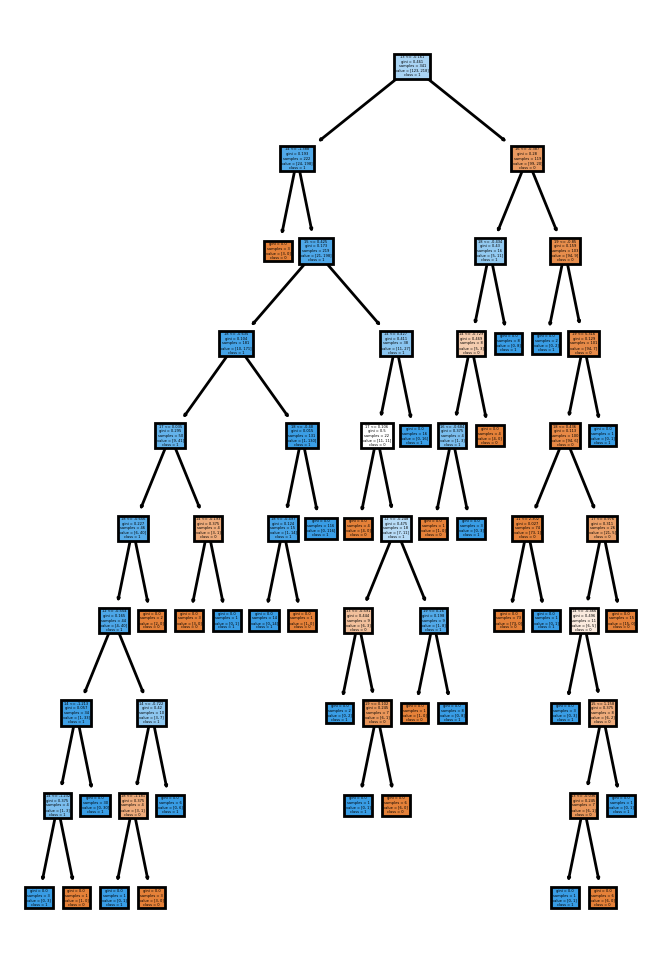

In [29]:
# Decision Tree Better Viz (Middle 10)

# Visualize the tree as a plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 6), dpi=200)
plot_tree(dt_classifier, filled=True, feature_names=data_features, class_names=data_classes, ax=axes)
plt.show()

#### Last 10 Features

In [30]:
# Loading Dataset
df = pd.read_csv('data.csv')                   
data_df = df.drop(columns=["diagnosis"])
data_scale = StandardScaler()
scaled_data = data_scale.fit_transform(data_df)
data_df = pd.DataFrame(scaled_data)

data_df2 = data_df[[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]]
y = df["diagnosis"]  
data_classes = ["0", "1"]

data_features = data_df2.columns.tolist()
data_features

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

In [31]:
# Data Prep
# Split training (60%) and test (40%)
data_train_df = data_df2.sample(frac=0.6, random_state=0)         
data_train_y = y[data_train_df.index]      

data_test_df = data_df2.drop(data_train_df.index) 
data_test_y = y[data_test_df.index]  

In [32]:
# Train Model
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier = dt_classifier.fit(data_train_df, data_train_y)

In [33]:
# Evaluate Model

prediction = dt_classifier.predict(data_test_df)
accuracy = dt_classifier.score(data_test_df, data_test_y)
conf_matrix = confusion_matrix(data_test_y, prediction)

print(accuracy)
print(conf_matrix)

0.9254385964912281
[[ 85   4]
 [ 13 126]]


In [34]:
# Decision Tree Viz (Last 10)

# Visualize the tree as a text
tree_text = export_text(dt_classifier, feature_names=data_features)
print(tree_text)

|--- 22 <= -0.06
|   |--- 27 <= 0.88
|   |   |--- 29 <= -1.55
|   |   |   |--- class: 0
|   |   |--- 29 >  -1.55
|   |   |   |--- 21 <= 0.97
|   |   |   |   |--- 28 <= -1.49
|   |   |   |   |   |--- 27 <= -0.67
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- 27 >  -0.67
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- 28 >  -1.49
|   |   |   |   |   |--- class: 1
|   |   |   |--- 21 >  0.97
|   |   |   |   |--- 21 <= 0.99
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- 21 >  0.99
|   |   |   |   |   |--- 24 <= 0.34
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- 24 >  0.34
|   |   |   |   |   |   |--- 20 <= -0.97
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- 20 >  -0.97
|   |   |   |   |   |   |   |--- class: 0
|   |--- 27 >  0.88
|   |   |--- 23 <= -0.82
|   |   |   |--- class: 1
|   |   |--- 23 >  -0.82
|   |   |   |--- class: 0
|--- 22 >  -0.06
|   |--- 21 <= -0.82
|   |   |--- 23 <= 0.15
|   |   |   |--- class:

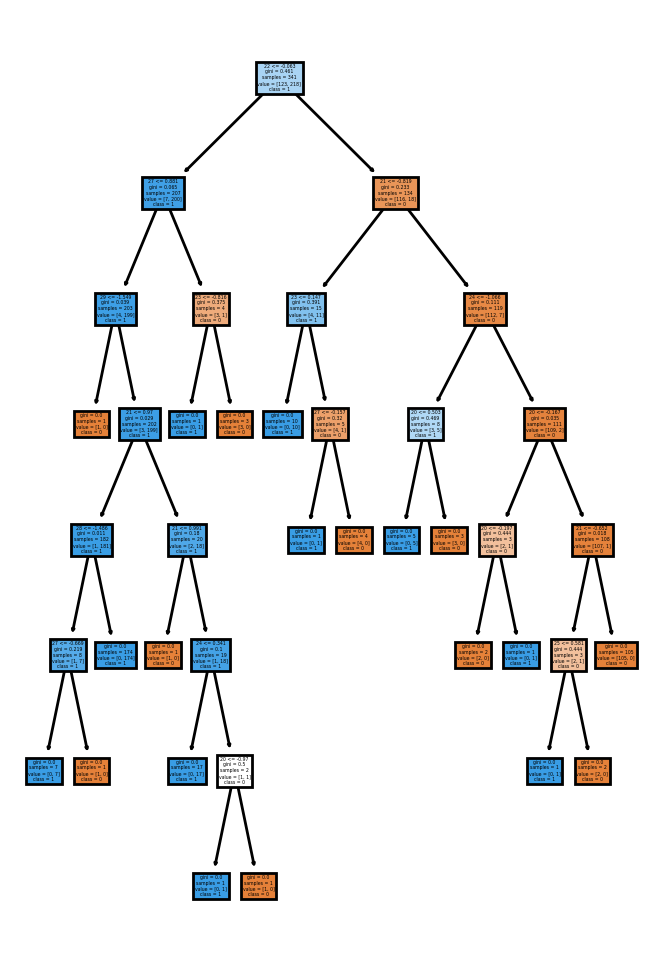

In [35]:
# Decision Tree Better Viz (Last 10)

# Visualize the tree as a plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 6), dpi=200)
plot_tree(dt_classifier, filled=True, feature_names=data_features, class_names=data_classes, ax=axes)
plt.show()

# Clustering

### Loading Packages

In [36]:
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [37]:
# Load Dataset
df = pd.read_csv("data.csv")
data_df = df.drop(columns=["diagnosis"]) # drop label
data_scale = StandardScaler()
scaled_data = data_scale.fit_transform(data_df)
data_df = pd.DataFrame(scaled_data)

y = df["diagnosis"]
data_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [38]:
# two features selected (Apparently, also important: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3043900/)

col1 = 9 # fractal_di0ension_0ean
col2 = 29 # fractal_di0ension_worst

In [40]:
# new dataframe with only two features
new_df = data_df[[col1, col2]]
new_df

,9,29
0,2.255747,1.937015
1,-0.868652,0.281190
2,-0.398008,0.201391
3,4.910919,4.935010
4,-0.562450,-0.397100
...,...,...
564,-0.931027,-0.709091
565,-1.058611,-0.973978
566,-0.895587,-0.318409
567,1.043695,2.219635


<Axes: xlabel='9', ylabel='29'>

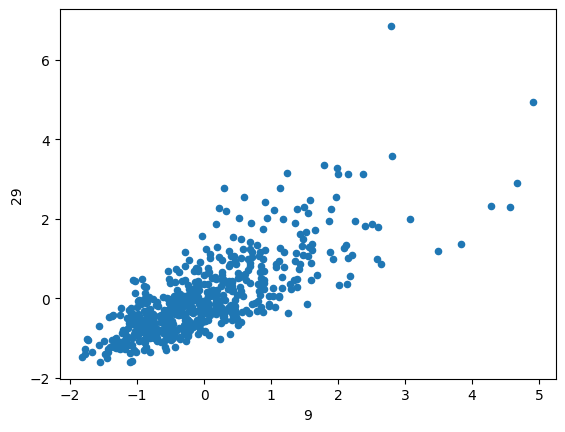

In [41]:
new_df.plot.scatter(col1, col2)

# Hierarchical Clustering

### Dendrogram

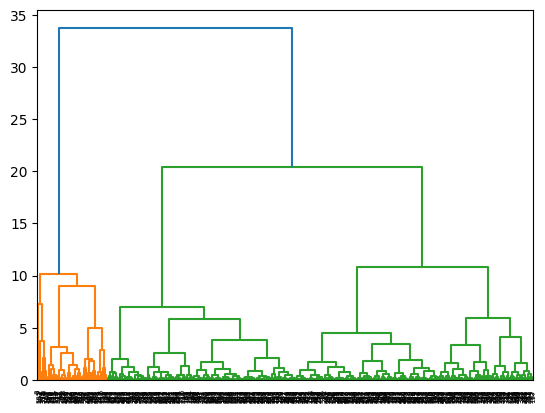

In [42]:
# Dendrogram

dendrogram = sch.dendrogram(sch.linkage(new_df, method='ward'))

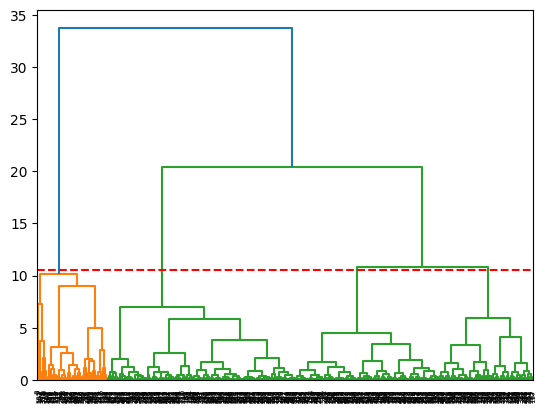

In [44]:
dendrogram = sch.dendrogram(sch.linkage(new_df, method='ward'))

plt.axhline(y=10.5, color='r', linestyle='--')
plt.show()

In [45]:
agg_model = AgglomerativeClustering(n_clusters=4, 
                                    metric='euclidean', 
                                    linkage='ward')
agg_model.fit(new_df)

AgglomerativeClustering(metric='euclidean', n_clusters=4)

<Axes: xlabel='9', ylabel='29'>

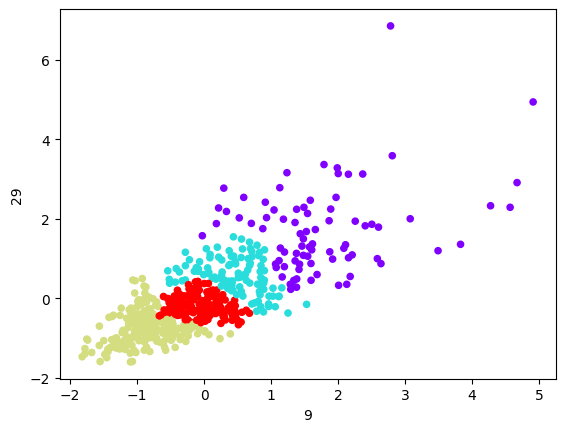

In [46]:
new_df.plot.scatter(col1, col2, c=agg_model.labels_, cmap="rainbow", colorbar=False)

# K-Means

### Silhouette Score

In [47]:
# k_range is from k=2 to k=16 (same range as lab 3)
k_range = range(2, 17)


for k in k_range:
    km_model = KMeans(n_clusters=k, n_init='auto', random_state=0)
    km_model.fit(new_df)
    km_labels = km_model.predict(new_df)
    avg = silhouette_score(new_df, km_labels)
    
    print((k, round(avg, 4)))

(2, 0.5473)
(3, 0.4338)
(4, 0.3713)
(5, 0.3529)
(6, 0.3693)
(7, 0.3172)
(8, 0.3258)
(9, 0.3329)
(10, 0.3382)
(11, 0.3298)
(12, 0.3289)
(13, 0.3297)
(14, 0.3478)
(15, 0.3492)
(16, 0.3347)


In [48]:
# closest to 1 is cluster 2 (k = 2)
km_model = KMeans(n_clusters=2, 
                  n_init='auto', random_state=0)
km_model.fit(new_df)

KMeans(n_clusters=2, n_init='auto', random_state=0)

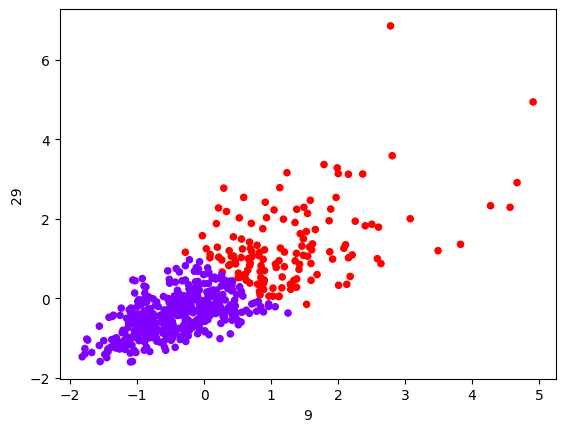

In [49]:
new_df.plot.scatter(col1, col2, c=km_model.labels_, cmap="rainbow", colorbar=False)
plt.show()

### Inertia: Elbow Method

In [50]:
# k_range is from k=1 to k=16 (same range as lab 3)
k_range = range(2, 17)

k_list = []
k_inertia_list = []

for k in k_range:
    km_model = KMeans(n_clusters=k, n_init="auto", random_state=1)
    km_model.fit(new_df)
    k_inertia_list.append(km_model.inertia_)
    
    k_list.append(k)
    
    print(str(k) + ": " + str(round(km_model.inertia_, 4)))

2: 507.2549
3: 333.5642
4: 261.5433
5: 220.9109
6: 195.3737
7: 172.0358
8: 149.432
9: 134.1439
10: 117.3542
11: 105.9713
12: 96.7134
13: 85.3799
14: 78.9412
15: 70.7546
16: 67.3322


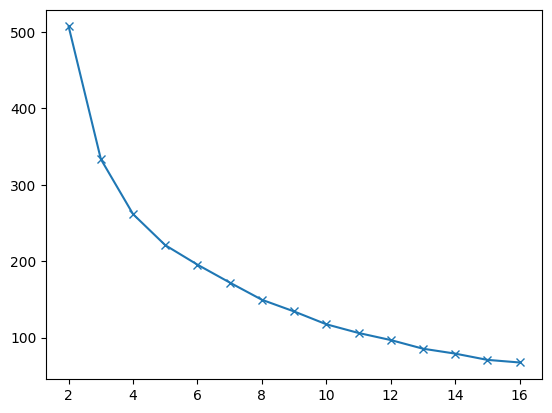

In [51]:
plt.plot(k_list, k_inertia_list, 'x-')
plt.show()

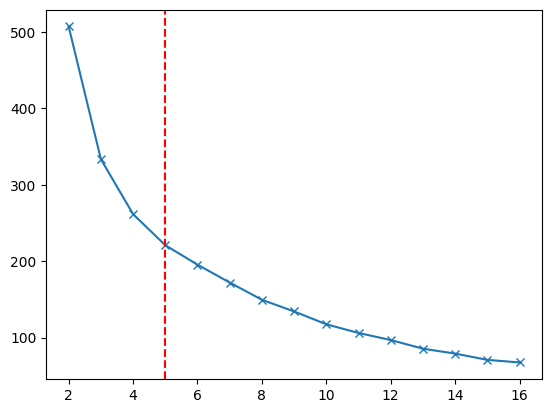

In [52]:
plt.plot(k_list, k_inertia_list, 'x-')

# plot a vertical line at x = 5 (k = 5)
plt.axvline(x=5, color='r', linestyle='--')
plt.show()

In [53]:
km_model = KMeans(n_clusters=5, 
                  n_init="auto", 
                  random_state=1)
km_model.fit(new_df)

KMeans(n_clusters=5, n_init='auto', random_state=1)

<Axes: xlabel='9', ylabel='29'>

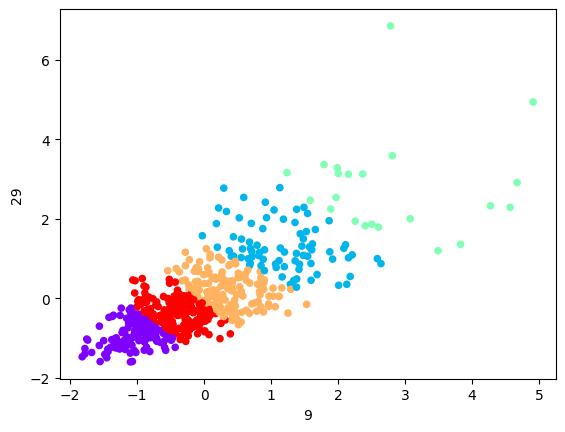

In [54]:
new_df.plot.scatter(col1, col2, c = km_model.labels_, 
                    cmap="rainbow",
                    colorbar=False)